In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("vehicle.csv")
print(data)

             make    model vehicle_class  engine_size  cylinders transmission  \
0       Chevrolet   Accord         Coupe          1.9          6       Manual   
1             BMW    Camry     Hatchback          3.5          5       Manual   
2         Hyundai    Civic       Minivan          5.3          5          CVT   
3        Mercedes    Camry         Sedan          5.8          3    Automatic   
4       Chevrolet  Model Z         Sedan          2.0          5          CVT   
...           ...      ...           ...          ...        ...          ...   
100513    Hyundai   Accord           SUV          3.6          5          CVT   
100514     Toyota  Model X   Convertible          3.4         12       Manual   
100515    Hyundai    Camry         Coupe          2.3          5          CVT   
100516      Honda    Camry         Sedan          2.5          5    Automatic   
100517   Mercedes  Model X         Coupe          2.3          3    Automatic   

       fuel_type  fuel_cons

In [3]:
data["cylinders"].value_counts()

cylinders
12    14511
4     14483
10    14397
5     14342
3     14280
8     14280
6     14225
Name: count, dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100518 entries, 0 to 100517
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   make                              100518 non-null  object 
 1   model                             100518 non-null  object 
 2   vehicle_class                     100518 non-null  object 
 3   engine_size                       100518 non-null  float64
 4   cylinders                         100518 non-null  int64  
 5   transmission                      100518 non-null  object 
 6   fuel_type                         100518 non-null  object 
 7   fuel_consumption_city             100518 non-null  float64
 8   fuel_consumption_hwy              100518 non-null  float64
 9   fuel_consumption_comb (L/100 km)  100518 non-null  float64
 10  fuel_consumption_comb (mpg)       100518 non-null  float64
 11  co2_emissions                     100518 non-null  f

- Observation: Identifies data types (numerical/categorical) and detects missing values.


In [6]:
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(100518, 12)
1206216


In [7]:
len(data)

100518

In [8]:
data.describe()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb (L/100 km),fuel_consumption_comb (mpg),co2_emissions
count,100518.000000,100518.000000,100518.000000,100518.000000,100518.000000,100518.000000,100518.000000
mean,3.505315,6.866173,12.492148,9.511520,11.001653,22.867922,247.516439
std,1.444379,3.050307,4.326338,3.173927,2.682402,6.414304,62.498261
min,1.000000,3.000000,5.000000,4.000000,4.500000,13.400000,92.400000
25%,2.300000,4.000000,8.800000,6.800000,9.000000,18.100000,201.500000
50%,3.500000,6.000000,12.500000,9.500000,11.000000,21.400000,246.600000
75%,4.800000,10.000000,16.200000,12.300000,13.000000,26.100000,292.200000
max,6.000000,12.000000,20.000000,15.000000,17.500000,52.300000,431.200000


In [9]:
data.reset_index(drop=True, inplace=True)
data.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb (L/100 km),fuel_consumption_comb (mpg),co2_emissions
0,Chevrolet,Accord,Coupe,1.9,6,Manual,Diesel,18.5,5.2,11.8,19.9,236.2
1,BMW,Camry,Hatchback,3.5,5,Manual,Gasoline,8.5,9.7,9.1,25.8,209.1
2,Hyundai,Civic,Minivan,5.3,5,CVT,Diesel,6.6,5.0,5.8,40.6,127.4
3,Mercedes,Camry,Sedan,5.8,3,Automatic,Ethanol,5.4,7.9,6.6,35.6,149.8
4,Chevrolet,Model Z,Sedan,2.0,5,CVT,Gasoline,13.2,10.6,11.9,19.8,265.2


In [137]:
data.isnull().sum()

make                                0
model                               0
vehicle_class                       0
engine_size                         0
cylinders                           0
transmission                        0
fuel_type                           0
fuel_consumption_city               0
fuel_consumption_hwy                0
fuel_consumption_comb (L/100 km)    0
fuel_consumption_comb (mpg)         0
co2_emissions                       0
dtype: int64

- Observation: Identifies which columns require data cleaning

In [24]:
X = data[['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_type']]  
y = data['co2_emissions']
X = pd.get_dummies(X, drop_first=True)  

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [34]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 1537.10
R-squared: 0.61


In [169]:
median_engine_size = data["engine_size"].median()
mean_engine_size = data["engine_size"].mean()
print("Median of engine_size: ",median_engine_size)
print("Mean of engine_size: ",mean_engine_size)

Median of engine_size:  3.5
Mean of engine_size:  3.505315465886708


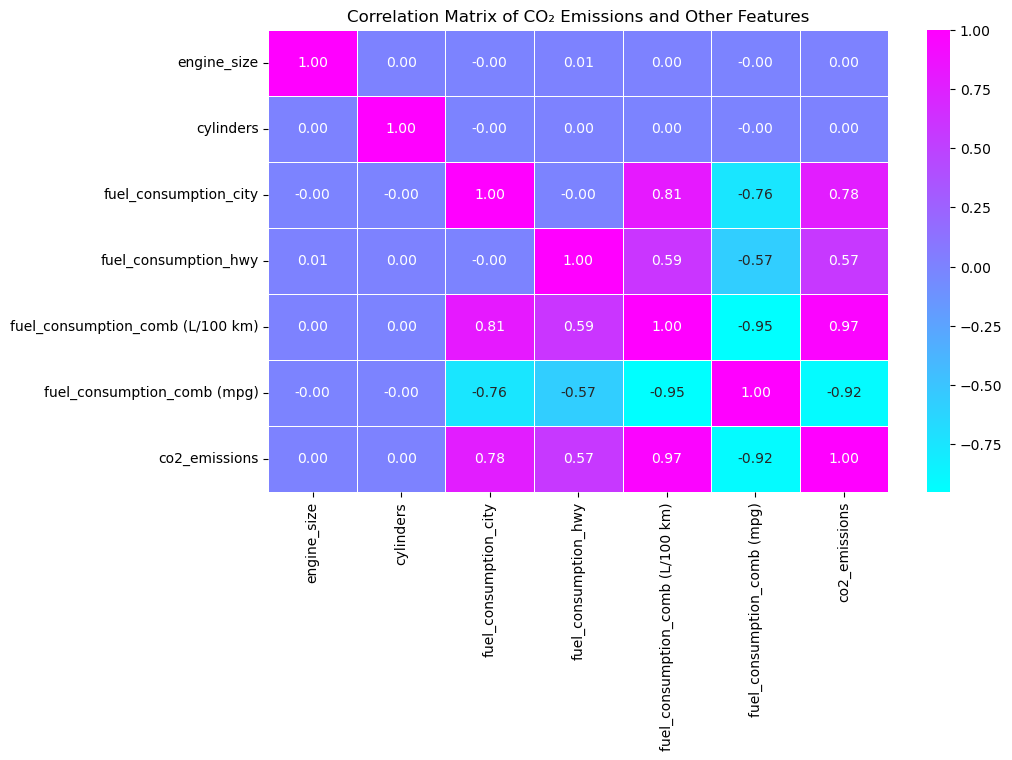

In [201]:
correlation_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="cool", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of CO₂ Emissions and Other Features")
plt.show()

#### Observation
- engine_size, fuel_consumption, or vehicle_weight might show strong positive correlations with CO₂ emissions.
- Negative correlations might indicate inverse relationships (e.g., fuel efficiency vs. emissions).

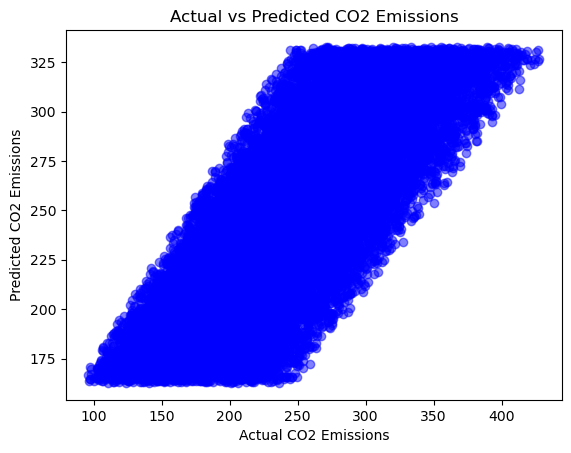

In [36]:
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Predicted CO2 Emissions')
plt.title('Actual vs Predicted CO2 Emissions')
plt.show()

In [171]:
data['engine_size'] = data['engine_size'].fillna(median_engine_size)
data.isnull().sum()

make                                0
model                               0
vehicle_class                       0
engine_size                         0
cylinders                           0
transmission                        0
fuel_type                           0
fuel_consumption_city               0
fuel_consumption_hwy                0
fuel_consumption_comb (L/100 km)    0
fuel_consumption_comb (mpg)         0
co2_emissions                       0
dtype: int64

In [142]:
mean_engine_size = data["engine_size"].mean()
print("Mean of engine_size: ",mean_engine_size)

Mean of engine_size:  3.505315465886708


In [173]:
print(data["model"].value_counts())
mode_model = data["model"].mode()[0]
print(mode_model)

model
Model Y     10183
Series 2    10183
Passat      10157
Model X     10124
Civic       10052
Accord      10034
Model Z      9983
Series 1     9971
Camry        9962
Focus        9869
Name: count, dtype: int64
Model Y


In [38]:
import joblib
joblib.dump(model, 'co2_emission_model.pkl')

['co2_emission_model.pkl']

In [40]:
from sklearn.preprocessing import StandardScaler
import joblib
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

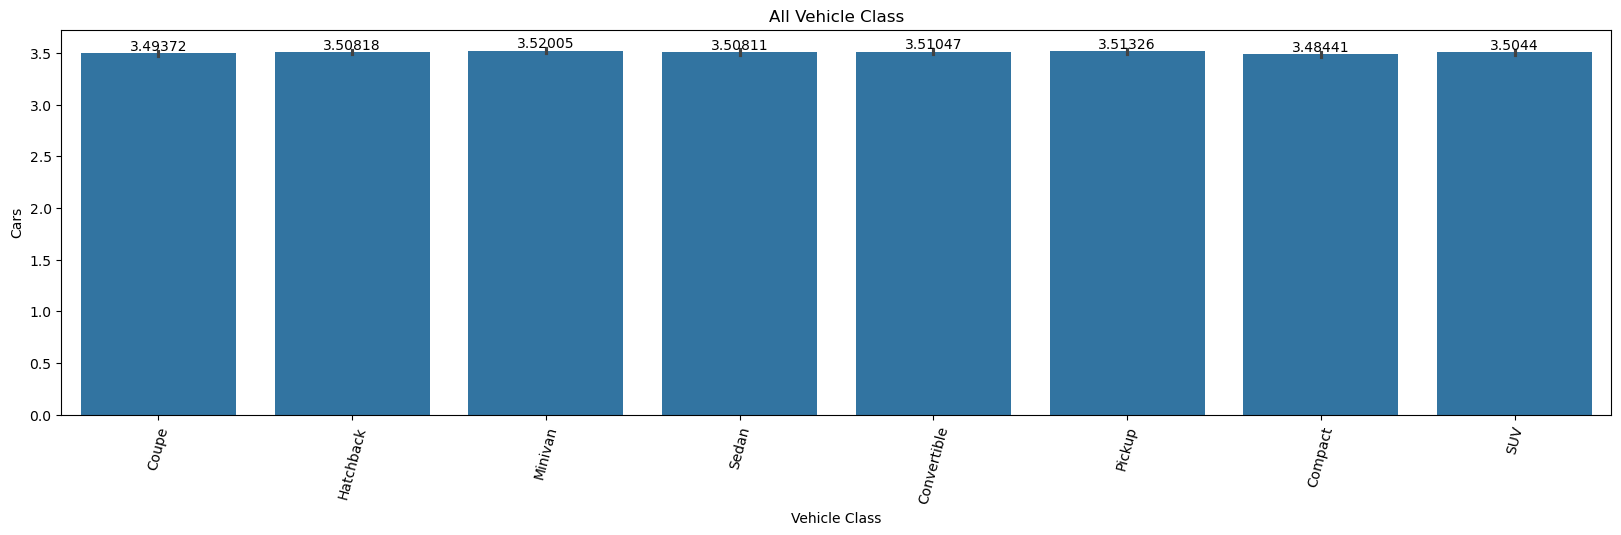

In [193]:
plt.figure(figsize=(20,5))
figure3 = sns.barplot(data = data, x = "vehicle_class",  y= "engine_size")
plt.xticks(rotation = 75)
plt.title("All Vehicle Class")
plt.xlabel("Vehicle Class")
plt.ylabel("Cars")
plt.bar_label(figure3.containers[0])
plt.show()


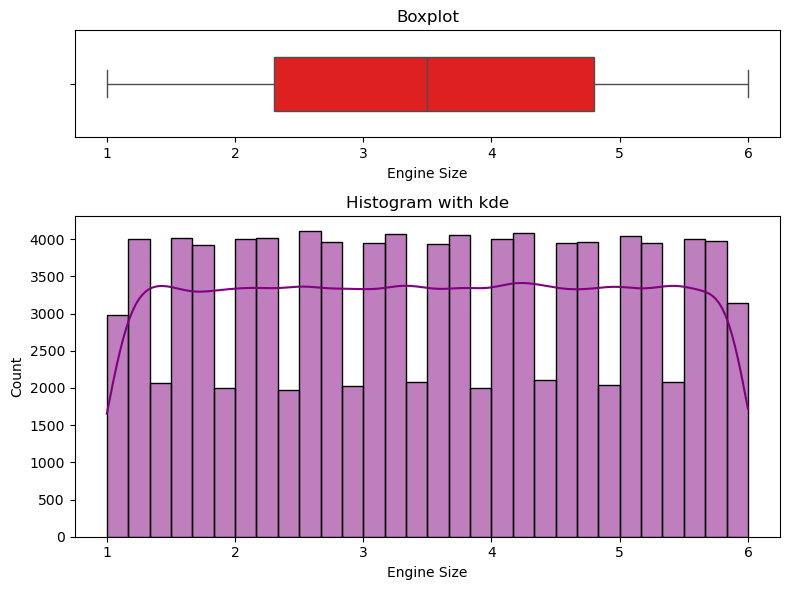

In [175]:
fig, axes = plt.subplots(2, 1,figsize=(8,6), gridspec_kw={'height_ratios':[1,3]})
sns.boxplot(data=data["engine_size"],ax=axes[0],color='red',width=0.5,orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Engine Size")
sns.histplot(data["engine_size"],kde=True, ax=axes[1],color='purple',bins=30)
axes[1].set_title("Histogram with kde")
axes[1].set_xlabel("Engine Size")
plt.tight_layout()
plt.show()

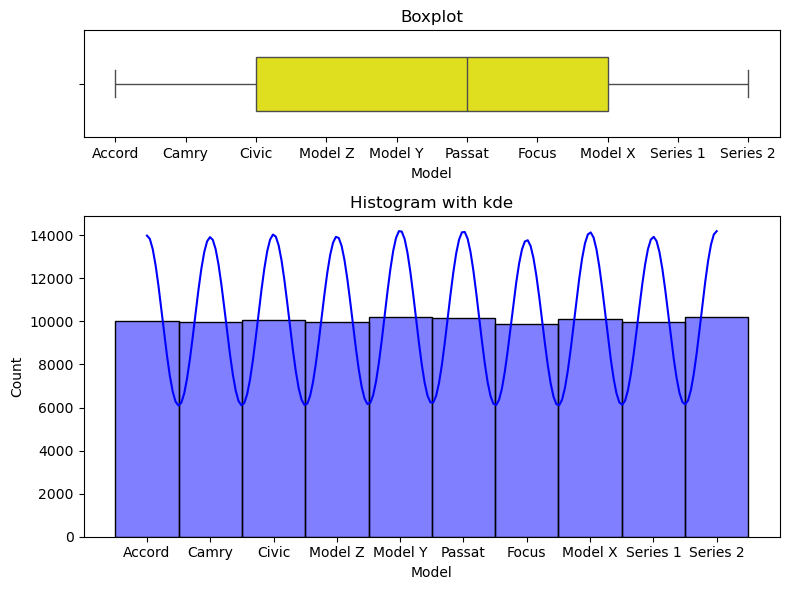

In [145]:

fig, axes = plt.subplots(2, 1,figsize=(8,6), gridspec_kw={'height_ratios':[1,3]})
sns.boxplot(data=data["model"],ax=axes[0],color='yellow',width=0.5,orient = 'h')
axes[0].set_title("Boxplot")
axes[0].set_xlabel("Model")
sns.histplot(data["model"],kde=True, ax=axes[1],color='blue',bins=30)
axes[1].set_title("Histogram with kde")
axes[1].set_xlabel("Model")
plt.tight_layout()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2270e86b980>,
 'caps': [<matplotlib.lines.Line2D at 0x2270e86bd70>,
 'boxes': [<matplotlib.lines.Line2D at 0x2270e86b740>],
 'medians': [<matplotlib.lines.Line2D at 0x2270e8382f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2270e8384d0>],
 'means': []}

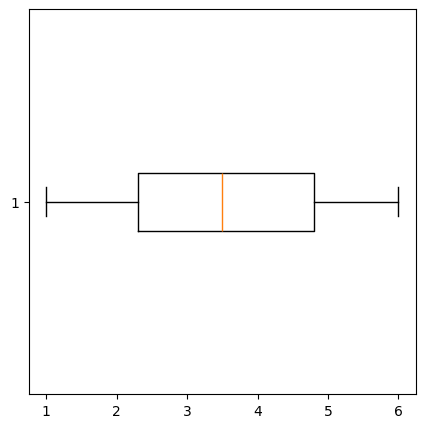

In [146]:
plt.figure(figsize=(5,5))
plt.boxplot(data["engine_size"],vert= False)

[array([2.3, 2.3, 4.8, 4.8, 2.3])]

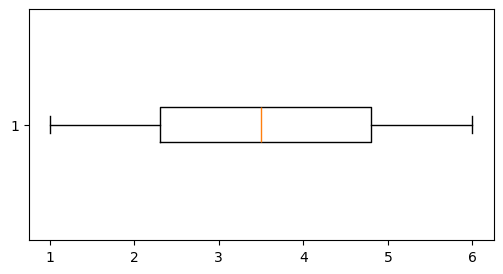

In [147]:
plt.figure(figsize=(6,3))
boxplot_data = plt.boxplot(data["engine_size"], vert=False)
[x.get_xdata() for x in boxplot_data['boxes']]


#### Observation
- Extracts data points from the boxplot to analyze outliers

In [151]:
data["engine_size"].describe()

count    100518.000000
mean          3.505315
std           1.444379
min           1.000000
25%           2.300000
50%           3.500000
75%           4.800000
max           6.000000
Name: engine_size, dtype: float64

Text(0.5, 0, 'Theretical Quantiles')

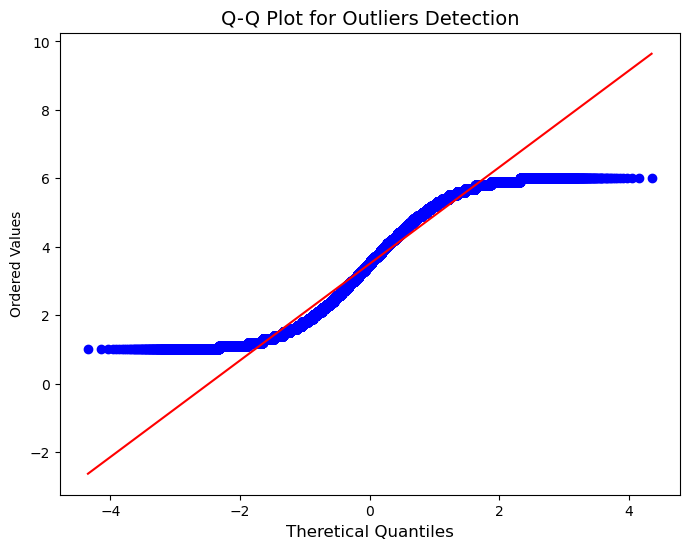

In [160]:
import scipy.stats as stats
plt.figure(figsize=(8, 6))
stats.probplot(data["engine_size"],dist="norm",plot=plt)
plt.title("Q-Q Plot for Outliers Detection",fontsize=14)
plt.xlabel("Theretical Quantiles",fontsize=12)

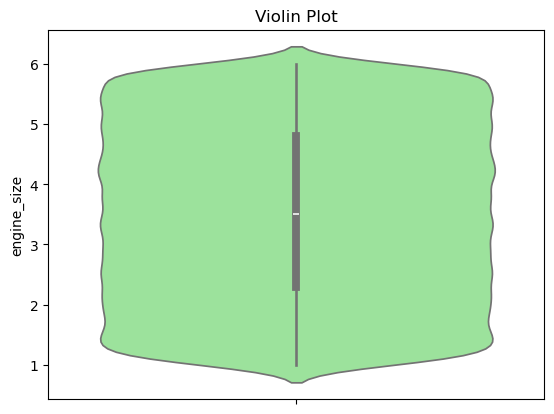

In [161]:
sns.violinplot(data=data["engine_size"],color='lightgreen')
plt.title("Violin Plot")
plt.show()